# 구글플레이 스토어 설치횟수 예측 회귀분석

In [400]:
import pandas as pd
import numpy as np

In [401]:
df = pd.read_csv('google_play_store_dataset.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [403]:
df = df.dropna(subset=['Rating'])

In [404]:
# 'Price' 컬럼의 첫 번째 문자 제거
df['Price'] = df['Price'].astype(str).str[1:]

# 'SIZE' 컬럼의 마지막 문자 제거
df['Size'] = df['Size'].astype(str).str[:-1]

# 'install'컬럼 마지막 문자 제거
df['Installs'] = df['Installs'].astype(str).str[:-1]

C:\Users\yeonn\AppData\Local\Temp\ipykernel_20248\3932675323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].astype(str).str[1:]
C:\Users\yeonn\AppData\Local\Temp\ipykernel_20248\3932675323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].astype(str).str[:-1]
C:\Users\yeonn\AppData\Local\Temp\ipykernel_20248\3932675323.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [405]:
df['Price'] = df['Price'].replace('','0')
# 숫자가 아닌 값 'Free'를 '0'으로 대체 후 쉼표 제거 및 정수형 변환
df['Installs'] = df['Installs'].replace('Free', '0')  # 'Free'를 '0'으로 대체
df['Installs'] = df['Installs'].str.replace(',', '')  # 쉼표 제거
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')  # 숫자로 변환, 변환 불가능한 값은 NaN


C:\Users\yeonn\AppData\Local\Temp\ipykernel_20248\836574728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].replace('','0')
C:\Users\yeonn\AppData\Local\Temp\ipykernel_20248\836574728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].replace('Free', '0')  # 'Free'를 '0'으로 대체
C:\Users\yeonn\AppData\Local\Temp\ipykernel_20248\836574728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [406]:
df['Price'].value_counts()

Price
0         8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
299.99       1
379.99       1
37.99        1
18.99        1
1.20         1
Name: count, Length: 74, dtype: int64

In [407]:
df.drop(axis=1,columns=['App','Current Ver','Android Ver','Genres','Last Updated'],inplace=True)

C:\Users\yeonn\AppData\Local\Temp\ipykernel_20248\2946684431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(axis=1,columns=['App','Current Ver','Android Ver','Genres','Last Updated'],inplace=True)


In [408]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# 원핫인코딩
category_dummies = pd.get_dummies(df['Category'], prefix='Category')
df = pd.concat([df, category_dummies], axis=1)
df.drop(axis=1,columns='Category',inplace=True)

category_dummies2 = pd.get_dummies(df['Content Rating'], prefix='Content Rating')
df = pd.concat([df, category_dummies2], axis=1)
df.drop(axis=1,columns='Content Rating',inplace=True)
df

df['Type'] = le.fit_transform(df['Type'])

In [409]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.astype(float)
df = df.dropna(subset=['Size'])

In [410]:
for col in df.columns:
    # IQR 계산
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치의 하한선과 상한선 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 제거
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [411]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 타겟 변수와 특성 변수 설정
y = df['Installs']
X = df.drop(axis=1, columns=['Installs'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# StandardScaler로 특성 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 리스트 정의 (SVR 대신 비선형 모델 추가)
models = {
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42)
}

# 모델 성능을 저장할 리스트
model_names = []
r2_scores = []
mae_scores = []
mape_scores = []

# 각 모델 학습 후 성능 기록
for model_name, model in models.items():
    # 모델 학습
    model.fit(X_train_scaled, y_train)
    
    # 예측값 생성
    y_pred = model.predict(X_test_scaled)
    
    # 성능 평가
    model_names.append(model_name)
    
    # R² (결정 계수) 계산
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # MAE (평균 절대 오차) 계산
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    
    # MAPE (평균 절대 백분율 오차) 계산
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mape_scores.append(mape)

# 결과 출력
for i, model_name in enumerate(model_names):
    print(f"모델: {model_name}")
    print(f"R² (결정 계수): {r2_scores[i]}")
    print(f"MAE (평균 절대 오차): {mae_scores[i]}")
    print(f"MAPE (평균 절대 백분율 오차): {mape_scores[i]}")
    print("-" * 50)


모델: DecisionTreeRegressor
R² (결정 계수): 0.7346805488122645
MAE (평균 절대 오차): 75294.69387755102
MAPE (평균 절대 백분율 오차): 2.212295918367347
--------------------------------------------------
모델: RandomForestRegressor
R² (결정 계수): 0.8176649618535425
MAE (평균 절대 오차): 77815.18010204082
MAPE (평균 절대 백분율 오차): 2.394819897959184
--------------------------------------------------
모델: GradientBoostingRegressor
R² (결정 계수): 0.7981626848916681
MAE (평균 절대 오차): 85105.56329913183
MAPE (평균 절대 백분율 오차): 14.547791535238156
--------------------------------------------------


리뷰,앱 크기,평점 이 설치수와 연관이 있음

C:\Users\yeonn\AppData\Local\Temp\ipykernel_20248\2916390455.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


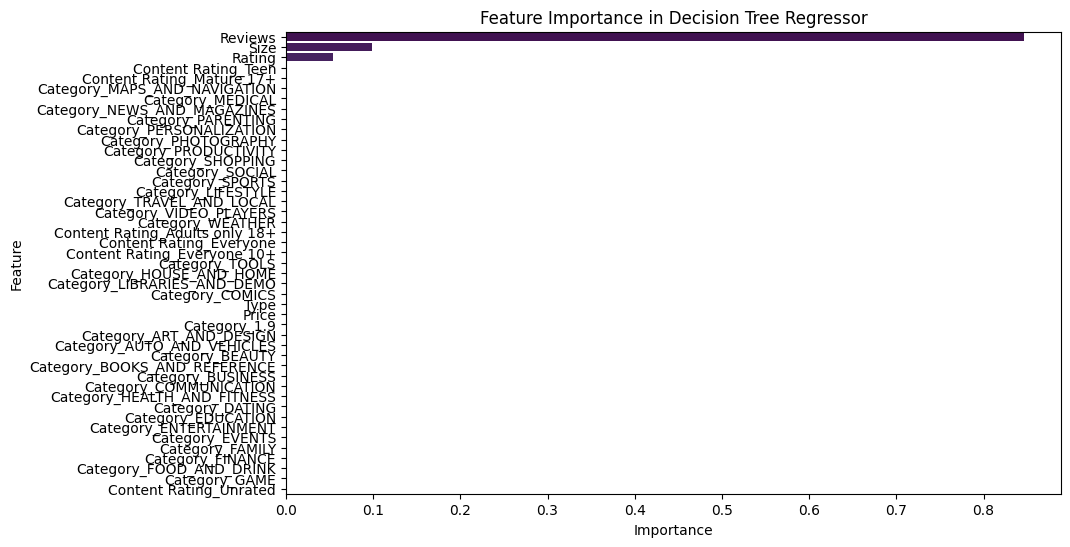

In [412]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 학습 (이 부분은 이전 코드에서 이미 했음)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# 피처 중요도 추출
feature_importances = model.feature_importances_

# 피처 이름 추출
features = X.columns

# 중요도와 피처 이름을 데이터프레임으로 결합
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 중요도에 따라 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance in Decision Tree Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


리뷰,사이즈 제외하고는 크게 상관성 X

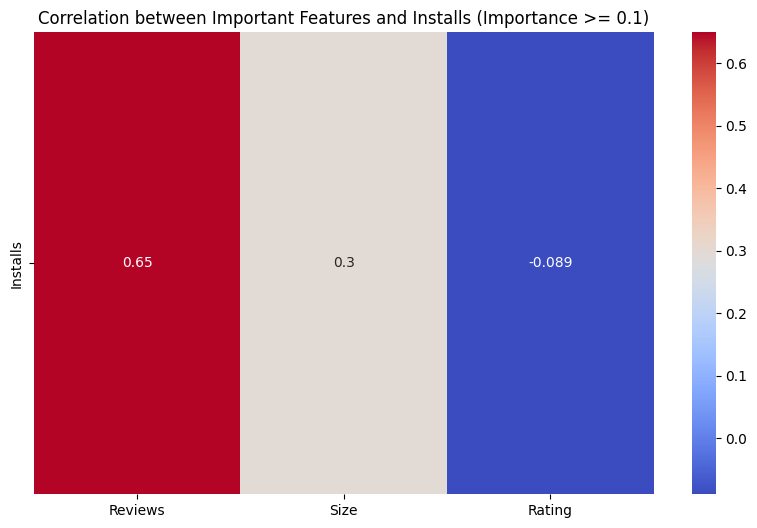

In [413]:
import seaborn as sns
import matplotlib.pyplot as plt

# 중요도가 0.1 이상인 피처만 필터링
important_features = importance_df[importance_df['Importance'] >= 0.01]['Feature']

# 상관계수 계산
correlation = df[important_features.tolist() + ['Installs']].corr()

# 'Installs'와 각 독립변수 간의 상관관계만 추출
install_corr = correlation['Installs'].drop('Installs')

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(install_corr.to_frame().T, annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation between Important Features and Installs (Importance >= 0.1)")
plt.show()


In [414]:
df2 = pd.read_csv('google_play_store_dataset.csv')
df2 = df2[['Category','Rating','Reviews','Size','Installs']]
# 숫자가 아닌 값 'Free'를 '0'으로 대체 후 쉼표 제거 및 정수형 변환

df2['Installs'] = df2['Installs'].astype(str).str[:-1]
df2['Installs'] = df2['Installs'].replace('Free', '0')  # 'Free'를 '0'으로 대체
df2['Installs'] = df2['Installs'].str.replace(',', '')  # 쉼표 제거
df2['Installs'] = pd.to_numeric(df2['Installs'], errors='coerce')  # 숫자로 변환, 변환 불가능한 값은 NaN
# 'SIZE' 컬럼의 마지막 문자 제거
df2['Size'] = df2['Size'].astype(str).str[:-1]

df2 = df2.dropna()
df2

,Category,Rating,Reviews,Size,Installs
0,ART_AND_DESIGN,4.1,159,19,10000.0
1,ART_AND_DESIGN,3.9,967,14,500000.0
2,ART_AND_DESIGN,4.7,87510,8.7,5000000.0
3,ART_AND_DESIGN,4.5,215644,25,50000000.0
4,ART_AND_DESIGN,4.3,967,2.8,100000.0
...,...,...,...,...,...
10834,FAMILY,4.0,7,2.6,500.0
10836,FAMILY,4.5,38,53,5000.0
10837,FAMILY,5.0,4,3.6,100.0
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with devic,1000.0


In [418]:
cleaned_col = ['Rating','Reviews','Size','Installs']
for i in cleaned_col:    
    df2[i] = df2[i].apply(pd.to_numeric, errors='coerce')
    df2.fillna(0,inplace=True)

In [419]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  9366 non-null   object 
 1   Rating    9366 non-null   float64
 2   Reviews   9366 non-null   int64  
 3   Size      9366 non-null   float64
 4   Installs  9366 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 439.0+ KB


In [420]:
df2.to_csv('dat_11weeks.csv',header=True,index = False)

#powerBI 시각화

게임은 용량과 상관없이 비슷한 설치수\
타 앱들은 50M 전의 가벼운 크기를 설치하는 것을 선호

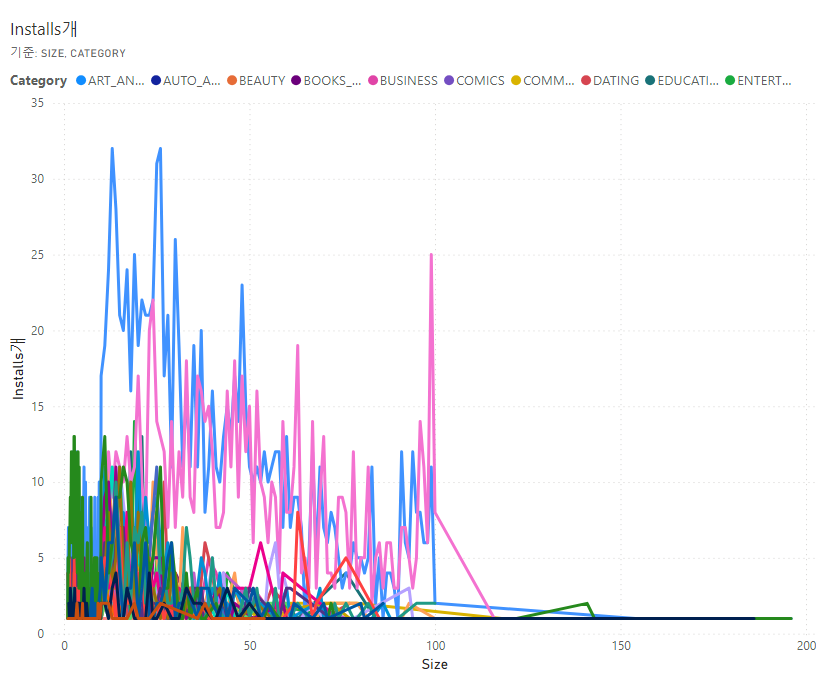

앱간 평균 별점은 큰 차이가 없음

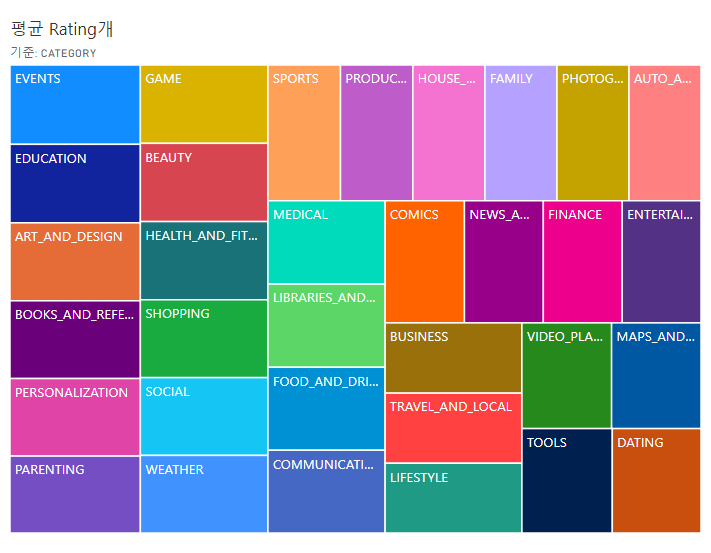